In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC  
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve 
from yellowbrick.classifier import ROCAUC


#prepr auto sklearn
from collections import Counter
import io
import warnings
warnings.filterwarnings('ignore')

In [0]:
# !sudo apt-get install build-essential swig
# !curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install
# !pip install auto-sklearn

# for _ in range(3):
#     try:
#         import autosklearn.classification
#         break
#     except:
#         pass
# else:
#     raise ImportError("failed to import from autosklearn")


## Injestion 

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Barneybean/heart_disease_classification/master/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,62,1,1,120,281,0,0,103,0,1.4,1,1,3,0
1,45,0,0,138,236,0,0,152,1,0.2,1,0,2,1
2,56,1,0,130,283,1,0,103,1,1.6,0,0,3,0
3,62,0,2,130,263,0,1,97,0,1.2,1,1,3,0
4,62,1,0,120,267,0,1,99,1,1.8,1,2,3,0


Data contains; 

age - age in years <br/> 
sex - (1 = male; 0 = female) <br/> 
cp - chest pain type <br/> 
trestbps - resting blood pressure (in mm Hg on admission to the hospital) <br/> 
chol - serum cholestoral in mg/dl <br/> 
fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) <br/> 
restecg - resting electrocardiographic results <br/> 
thalach - maximum heart rate achieved <br/> 
exang - exercise induced angina (1 = yes; 0 = no) <br/> 
oldpeak - ST depression induced by exercise relative to rest <br/> 
slope - the slope of the peak exercise ST segment <br/> 
ca - number of major vessels (0-3) colored by flourosopy <br/> 
thal - 3 = normal; 6 = fixed defect; 7 = reversable defect <br/> 
target - have disease or not (1=yes, 0=no)<br/> 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
age         200 non-null int64
sex         200 non-null int64
cp          200 non-null int64
trestbps    200 non-null int64
chol        200 non-null int64
fbs         200 non-null int64
restecg     200 non-null int64
thalach     200 non-null int64
exang       200 non-null int64
oldpeak     200 non-null float64
slope       200 non-null int64
ca          200 non-null int64
thal        200 non-null int64
target      200 non-null int64
dtypes: float64(1), int64(13)
memory usage: 22.0 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,54.940000,0.665000,0.910000,132.010000,248.980000,0.175000,0.525000,148.835000,0.330000,1.060500,1.400000,0.800000,2.320000,0.530000
std,8.833832,0.473175,1.023296,17.549353,50.322673,0.380921,0.539286,22.973828,0.471393,1.154711,0.609803,1.027266,0.616034,0.500352
min,35.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.500000,1.000000,0.000000,130.000000,243.000000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,281.250000,0.000000,1.000000,165.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,417.000000,1.000000,2.000000,194.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## EDA

In [5]:
df.target.value_counts()

1    106
0     94
Name: target, dtype: int64

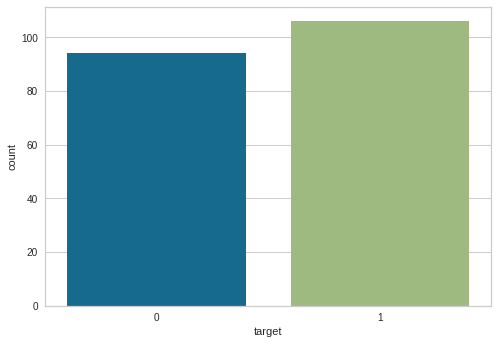

In [6]:
sns.countplot(x="target", data=df)
plt.show()

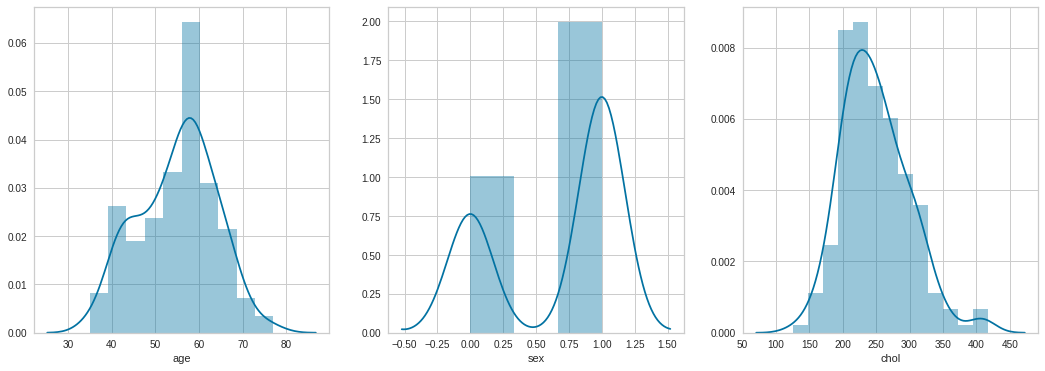

In [7]:
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
sns.distplot(df['age'])

plt.subplot(1,3,2)
sns.distplot(df['sex'])

plt.subplot(1,3,3)
sns.distplot(df['chol'])



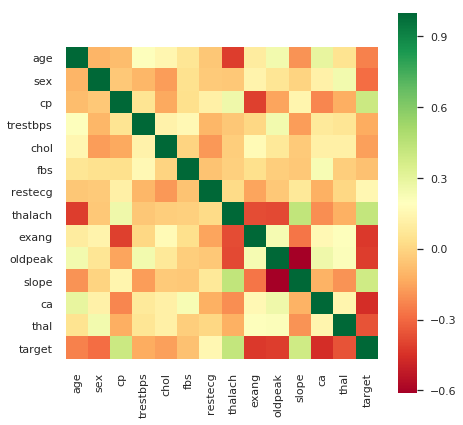

In [8]:
sns.set(rc={'figure.figsize':(7,7)})

sns.heatmap(df.iloc[:,:].corr(), square=True, cmap='RdYlGn')


In [10]:
# slope, fbs, chol are not so correlated with target, so exclude them from the modeling 
df_filtered = df.drop(['target'], axis=1)
df_filtered.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,62,1,1,120,281,0,0,103,0,1.4,1,1,3
1,45,0,0,138,236,0,0,152,1,0.2,1,0,2
2,56,1,0,130,283,1,0,103,1,1.6,0,0,3
3,62,0,2,130,263,0,1,97,0,1.2,1,1,3
4,62,1,0,120,267,0,1,99,1,1.8,1,2,3


## Model


In [0]:
X = df_filtered
y = df.target

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)


### Logistic Regression

In [13]:
# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

#### Grid Search for Logistic Regression

In [0]:
#Create Hyperparameter Search Space
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [0]:
#Create Grid Search
# Create grid search using 5-fold cross validation
clf = GridSearchCV(logreg, hyperparameters, cv=5, verbose=0)

In [16]:
clf

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.00000e+00, 2.78256e+00, 7.74264e+00, 2.15443e+01, 5.99484e+01,
       1.66810e+02, 4.64159e+02, 1.29155e+03, 3.59381e+03, 1.00000e+04]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
#Conduct Grid Search
# Fit grid search
best_model = clf.fit(X_train, y_train)

In [18]:
#View Hyperparameter Values Of Best Model
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 7.742636826811269


In [19]:
#Predict Using Best Model
# Predict target vector
y_pred_log = best_model.predict(X_test)
y_pred_log

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1])

#### Accessment and interpretation of the best model selected

In [22]:

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred_log))
print('-----')
print(classification_report(y_test, y_pred_log))

[[29 11]
 [ 3 37]]
-----
              precision    recall  f1-score   support

           0       0.91      0.72      0.81        40
           1       0.77      0.93      0.84        40

   micro avg       0.82      0.82      0.82        80
   macro avg       0.84      0.82      0.82        80
weighted avg       0.84      0.82      0.82        80



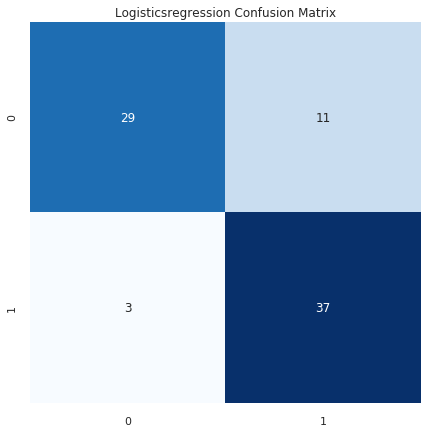

In [23]:
plt.title("Logisticsregression Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_pred_log),annot=True,cmap="Blues",fmt="d",cbar=False)

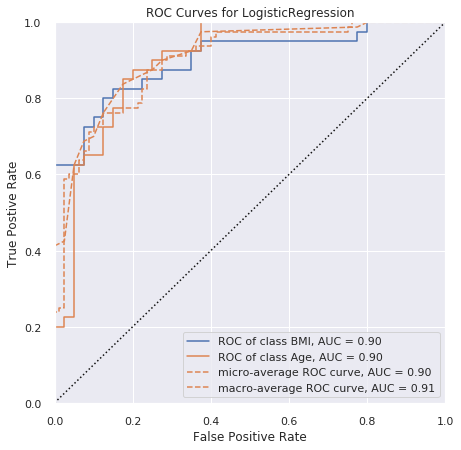

In [24]:
classes = ["BMI", "Age"]
# Instantiate the visualizer with the classification model
visualizer = ROCAUC(LogisticRegression(), classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

#### Interpretation performance - from business impact viewpoint (false negatives vs false positives)

precision = True Positive / (True Positive + False Positive)
recall = True Positive / (True Positive + False Negative)

The precision of 0.84 indicates that 84% of classified heart disease are actually having heart disease. This is a relative high precision but in real case, 
this type I error (16%) will waste medical resources and cases unecessary burdon to the patient.

The Recall of 0.82 indicates that 82% of patients with disease will be correctly detected but 18% will miss. This 18% is type II error. In this case, the 
18% miscclassifcation means delay of treatment because the algorithem failed to detect them. Given this analysis, this model needs improvement. 

### SVM

We have divided the data into training and testing sets. Now is the time to train our SVM on the training data. Scikit-Learn contains the svm library, which contains built-in classes for different SVM algorithms. Since we are going to perform a classification task, we will use the support vector classifier class, which is written as SVC in the Scikit-Learn's svm library. This class takes one parameter, which is the kernel type. This is very important. In the case of a simple SVM we simply set this parameter as "linear" since simple SVMs can only classify linearly separable data. We will see non-linear kernels in the next section.

The fit method of SVC class is called to train the algorithm on the training data, which is passed as a parameter to the fit method. Execute the following code to train the algorithm:

In [25]:
svm = SVC(kernel='linear')  
svm.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [26]:
#Grid Search
parameters = {'kernel':('linear', 'rbf'), 'C':(1,0.25,0.5,0.75),'gamma': (1,2,3,'auto'),'decision_function_shape':('ovo','ovr'),'shrinking':(True,False)}
clf = GridSearchCV(svm, parameters)
clf.fit(X_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ('linear', 'rbf'), 'C': (1, 0.25, 0.5, 0.75), 'gamma': (1, 2, 3, 'auto'), 'decision_function_shape': ('ovo', 'ovr'), 'shrinking': (True, False)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [27]:
clf.best_params_

{'C': 0.75,
 'decision_function_shape': 'ovo',
 'gamma': 1,
 'kernel': 'linear',
 'shrinking': True}

In [28]:
y_pred_SVC = svm.predict(X_test)  
y_pred_SVC

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1])

#### Accessment and interpretation of the best model selected

In [29]:
# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred_SVC))
print('-----')
print(classification_report(y_test, y_pred_SVC))

[[26 14]
 [ 1 39]]
-----
              precision    recall  f1-score   support

           0       0.96      0.65      0.78        40
           1       0.74      0.97      0.84        40

   micro avg       0.81      0.81      0.81        80
   macro avg       0.85      0.81      0.81        80
weighted avg       0.85      0.81      0.81        80



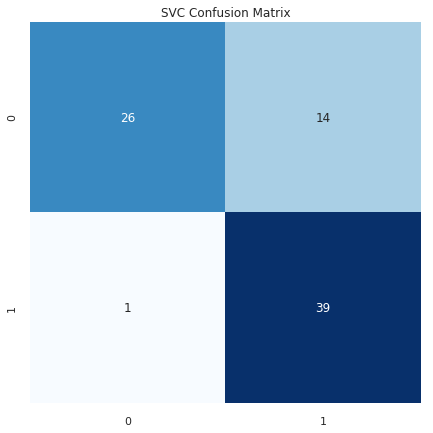

In [30]:
plt.title("SVC Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_pred_SVC),annot=True,cmap="Blues",fmt="d",cbar=False)

#### Interpretation performance - from business impact viewpoint (false negatives vs false positives)

The precision of 0.85 indicates that 85% of classified heart disease are actually having heart disease. This is a relative high precision but in real case, 
this type I error (15%) will waste medical resources and cases unecessary burdon to the patient.

The Recall of 0.85 indicates that 81% of patients with disease will be correctly detected but 19% will miss. This 19% is type II error. In this case, the 
19% miscclassifcation means delay of treatment because the algorithem failed to detect them. Given this analysis, this model needs improvement. 

### Random Forest Classifier


In [31]:
rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [32]:
CV_rfc.best_params_


{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'n_estimators': 500}

In [0]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')

In [34]:

rfc1.fit(X_train, y_train)

y_pred_rf=rfc1.predict(X_test)
y_pred_rf

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1])

In [35]:
# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred_rf))
print('-----')
print(classification_report(y_test, y_pred_rf))

[[28 12]
 [ 3 37]]
-----
              precision    recall  f1-score   support

           0       0.90      0.70      0.79        40
           1       0.76      0.93      0.83        40

   micro avg       0.81      0.81      0.81        80
   macro avg       0.83      0.81      0.81        80
weighted avg       0.83      0.81      0.81        80



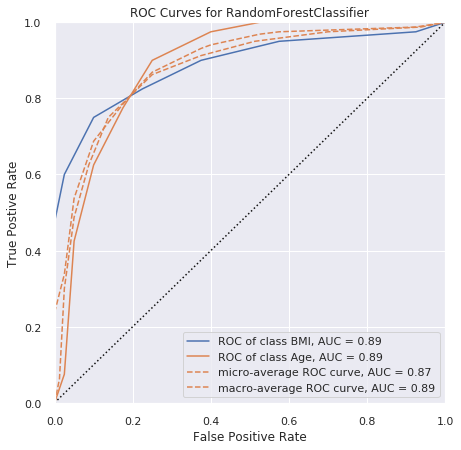

In [36]:
classes = ["BMI", "Age"]
# Instantiate the visualizer with the classification model
visualizer = ROCAUC(RandomForestClassifier(random_state=42), classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

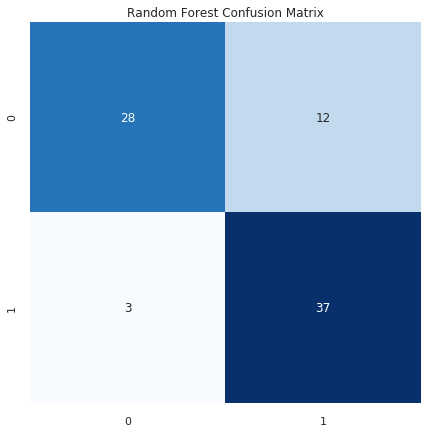

In [37]:
plt.title("Random Forest Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_pred_rf),annot=True,cmap="Blues",fmt="d",cbar=False)

#### Interpretation performance - from business impact viewpoint (false negatives vs false positives)


The precision of 0.83 indicates that 83% of classified heart disease are actually having heart disease. This is a relative high precision but in real case, 
this type I error (17%) will waste medical resources and cases unecessary burdon to the patient.

The Recall of 0.81 indicates that 81% of patients with disease will be correctly detected but 19% will miss. This 19% is type II error. In this case, the 
19% miscclassifcation means delay of treatment because the algorithem failed to detect them. Given this analysis, this model needs improvement. 

## Model Comparison, Logistic Regression vs. SVM vs. Random Forest

Below table is the model performance of three models obtained with GridSearch with 5 folds. We can see that **Random Forest outperforms the other models on all four performance metrics (Precisision, Recall, F1-score, Support).**



|Indicators - Weighted Avg | LogisticRegression|  SVM|  Random Forest|
| ------------- |-------------|------------- |-------------|
|Precision| 0.84 |0.85| 0.83|
|Recalls |0.82| 0.81| 0.81|
|F1-Score |0.82 |0.81 |0.81|
|Support| 80| 80| 80|


In the case of identifying high-risk population, we think false negative error(Recall) is more important than false positive (Precision). Prevention cost is much lower than medical treatment cost, so we want to identify as much high-risk people as possible. We can see that Logisticregression performs very well compared with the other two given similar precision.

## H2O AutoML

In [38]:
!pip install -U h2o

     |████████████████████████████████| 121.0MB 1.2MB/s 
  Stored in directory: /root/.cache/pip/wheels/e9/92/d1/61cddd17defd8ba2a10400d2b3adf917377769610d904c279d
Successfully built h2o


In [40]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

train = h2o.import_file("https://raw.githubusercontent.com/Barneybean/heart_disease_classification/master/heart_train.csv")

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,06 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.2
H2O cluster version age:,20 days
H2O cluster name:,H2O_from_python_unknownUser_ojkei9
H2O cluster total nodes:,1
H2O cluster free memory:,3 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [41]:
x = train.columns
y='target'

x.remove(y)

train[y] = train[y].asfactor()

aml = H2OAutoML(max_runtime_secs = 30)
aml.train(x=x, y=y, training_frame = train)

lb = aml.leaderboard
lb

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,mean_per_class_error,rmse,mse
XGBoost_1_AutoML_20190507_021517,0.902679,0.390481,0.174704,0.352192,0.124039
XGBoost_2_AutoML_20190507_021517,0.900834,0.421679,0.181884,0.362052,0.131082
XGBoost_3_AutoML_20190507_021517,0.899253,0.402736,0.174111,0.357505,0.12781
XGBoost_grid_1_AutoML_20190507_021517_model_1,0.898112,0.402608,0.180698,0.358003,0.128166
StackedEnsemble_AllModels_AutoML_20190507_021517,0.897628,0.399296,0.172925,0.35647,0.127071
GBM_2_AutoML_20190507_021517,0.896004,0.4051,0.172925,0.35977,0.129434
StackedEnsemble_BestOfFamily_AutoML_20190507_021517,0.896004,0.408439,0.181291,0.360683,0.130093
GLM_grid_1_AutoML_20190507_021517_model_1,0.892446,0.402469,0.174045,0.358261,0.128351
GBM_4_AutoML_20190507_021517,0.89126,0.412699,0.195784,0.364669,0.132983
GBM_3_AutoML_20190507_021517,0.888362,0.416732,0.208432,0.367002,0.134691


In [42]:
aml.leader

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_1_AutoML_20190507_021517


ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.0891917173351261
RMSE: 0.29864982393285633
LogLoss: 0.30261551509996076
Mean Per-Class Error: 0.11007905138339913
AUC: 0.9551163812033377
pr_auc: 0.9558127854839032
Gini: 0.9102327624066755
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5542528033256531: 


,0,1,Error,Rate
0,121.0,17.0,0.1232,(17.0/138.0)
1,16.0,149.0,0.097,(16.0/165.0)
Total,137.0,166.0,0.1089,(33.0/303.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.5542528,0.9003021,164.0
max f2,0.3802867,0.9367681,192.0
max f0point5,0.7197076,0.9158050,126.0
max accuracy,0.5542528,0.8910891,164.0
max precision,0.9760516,1.0,0.0
max recall,0.0717116,1.0,265.0
max specificity,0.9760516,1.0,0.0
max absolute_mcc,0.5542528,0.7803218,164.0
max min_per_class_accuracy,0.5951244,0.8848485,159.0
max mean_per_class_accuracy,0.5542528,0.8899209,164.0


Gains/Lift Table: Avg response rate: 54.46 %, avg score: 54.25 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0132013,0.9724002,1.8363636,1.8363636,1.0,0.9742492,1.0,0.9742492,0.0242424,0.0242424,83.6363636,83.6363636
,2,0.0231023,0.9659065,1.8363636,1.8363636,1.0,0.9668839,1.0,0.9710926,0.0181818,0.0424242,83.6363636,83.6363636
,3,0.0330033,0.9654271,1.8363636,1.8363636,1.0,0.9656249,1.0,0.9694523,0.0181818,0.0606061,83.6363636,83.6363636
,4,0.0429043,0.9626382,1.8363636,1.8363636,1.0,0.9635664,1.0,0.9680940,0.0181818,0.0787879,83.6363636,83.6363636
,5,0.0528053,0.9614492,1.8363636,1.8363636,1.0,0.9619179,1.0,0.9669360,0.0181818,0.0969697,83.6363636,83.6363636
,6,0.1023102,0.9479769,1.8363636,1.8363636,1.0,0.9535182,1.0,0.9604435,0.0909091,0.1878788,83.6363636,83.6363636
,7,0.1518152,0.9299826,1.8363636,1.8363636,1.0,0.9376760,1.0,0.9530193,0.0909091,0.2787879,83.6363636,83.6363636
,8,0.2013201,0.9042132,1.7139394,1.8062593,0.9333333,0.9184337,0.9836066,0.9445147,0.0848485,0.3636364,71.3939394,80.6259314
,9,0.3003300,0.8332106,1.7751515,1.7960040,0.9666667,0.8729683,0.9780220,0.9209280,0.1757576,0.5393939,77.5151515,79.6003996
,10,0.3993399,0.7398159,1.7139394,1.7756574,0.9333333,0.7816467,0.9669421,0.8863954,0.1696970,0.7090909,71.3939394,77.5657400




ModelMetricsBinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.12403892737082124
RMSE: 0.35219160604821526
LogLoss: 0.3904806299117297
Mean Per-Class Error: 0.1741106719367589
AUC: 0.9026789635485287
pr_auc: 0.9039520546105236
Gini: 0.8053579270970574
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4587062895298004: 


,0,1,Error,Rate
0,104.0,34.0,0.2464,(34.0/138.0)
1,17.0,148.0,0.103,(17.0/165.0)
Total,121.0,182.0,0.1683,(51.0/303.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4587063,0.8530259,179.0
max f2,0.2306838,0.9131905,224.0
max f0point5,0.5898682,0.8404385,161.0
max accuracy,0.4764476,0.8316832,177.0
max precision,0.9766454,1.0,0.0
max recall,0.0620914,1.0,274.0
max specificity,0.9766454,1.0,0.0
max absolute_mcc,0.4587063,0.6615497,179.0
max min_per_class_accuracy,0.6092832,0.8121212,156.0
max mean_per_class_accuracy,0.4764476,0.8258893,177.0


Gains/Lift Table: Avg response rate: 54.46 %, avg score: 55.03 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0132013,0.9667339,1.8363636,1.8363636,1.0,0.9705908,1.0,0.9705908,0.0242424,0.0242424,83.6363636,83.6363636
,2,0.0231023,0.9582657,1.8363636,1.8363636,1.0,0.9584931,1.0,0.9654061,0.0181818,0.0424242,83.6363636,83.6363636
,3,0.0330033,0.9560573,1.8363636,1.8363636,1.0,0.9566021,1.0,0.9627649,0.0181818,0.0606061,83.6363636,83.6363636
,4,0.0429043,0.9529740,1.8363636,1.8363636,1.0,0.9535771,1.0,0.9606446,0.0181818,0.0787879,83.6363636,83.6363636
,5,0.0528053,0.9518947,1.2242424,1.7215909,0.6666667,0.9523381,0.9375,0.9590872,0.0121212,0.0909091,22.4242424,72.1590909
,6,0.1023102,0.9425132,1.8363636,1.7771261,1.0,0.9468132,0.9677419,0.9531481,0.0909091,0.1818182,83.6363636,77.7126100
,7,0.1518152,0.9158435,1.8363636,1.7964427,1.0,0.9321840,0.9782609,0.9463120,0.0909091,0.2727273,83.6363636,79.6442688
,8,0.2013201,0.8942396,1.7139394,1.7761550,0.9333333,0.9094759,0.9672131,0.9372539,0.0848485,0.3575758,71.3939394,77.6154993
,9,0.3003300,0.8368516,1.6527273,1.7354645,0.9,0.8689898,0.9450549,0.9147493,0.1636364,0.5212121,65.2727273,73.5464535
,10,0.3993399,0.7251996,1.3466667,1.6390684,0.7333333,0.7829402,0.8925620,0.8820693,0.1333333,0.6545455,34.6666667,63.9068370



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.8482513,0.0286668,0.9016393,0.8360656,0.7868853,0.8333333,0.8833333
auc,0.9064053,0.0149730,0.9264069,0.8993506,0.8701299,0.9079686,0.9281706
err,0.1517486,0.0286668,0.0983607,0.1639344,0.2131147,0.1666667,0.1166667
err_count,9.2,1.7549928,6.0,10.0,13.0,10.0,7.0
f0point5,0.8365389,0.0367324,0.9235669,0.8048781,0.7772021,0.8121827,0.8648649
f1,0.8725724,0.0214668,0.90625,0.8684211,0.8219178,0.8648649,0.9014084
f2,0.9141105,0.0201049,0.8895705,0.9428572,0.872093,0.9248555,0.9411765
lift_top_group,1.8363637,0.0104973,1.8484849,1.8484849,1.8484849,1.8181819,1.8181819
logloss,0.3902969,0.0287730,0.3725694,0.3854317,0.4685491,0.3740542,0.3508802
max_per_class_error,0.2782107,0.0657893,0.1212121,0.3571429,0.3571429,0.3333333,0.2222222


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
,2019-05-07 02:15:23,6.200 sec,0.0,0.5,0.6931472,0.5,0.0,1.0,0.4554455
,2019-05-07 02:15:23,6.218 sec,5.0,0.4595266,0.6149262,0.9265920,0.8763442,1.8363636,0.1551155
,2019-05-07 02:15:23,6.237 sec,10.0,0.4238475,0.5490032,0.9375933,0.8893941,1.8363636,0.1287129
,2019-05-07 02:15:23,6.263 sec,15.0,0.4006759,0.5064760,0.9360343,0.9184169,1.8363636,0.1287129
,2019-05-07 02:15:24,6.281 sec,20.0,0.3797219,0.4679344,0.9381643,0.9196604,1.8363636,0.1155116
,2019-05-07 02:15:24,6.301 sec,25.0,0.3637123,0.4375474,0.9407773,0.9226291,1.8363636,0.1155116
,2019-05-07 02:15:24,6.319 sec,30.0,0.3517012,0.4145376,0.9440053,0.9267886,1.8363636,0.1155116
,2019-05-07 02:15:24,6.337 sec,35.0,0.3422974,0.3956322,0.9437857,0.9253117,1.8363636,0.1155116
,2019-05-07 02:15:24,6.356 sec,40.0,0.3338897,0.3781652,0.9449495,0.9270782,1.8363636,0.1155116
,2019-05-07 02:15:24,6.376 sec,45.0,0.3279322,0.3656323,0.9462231,0.9465867,1.8363636,0.1122112


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
cp,406.2941895,1.0,0.2331311
thal,330.3225098,0.8130131,0.1895386
ca,287.4466553,0.7074840,0.1649365
oldpeak,170.2926025,0.4191362,0.0977137
exang,130.2669220,0.3206222,0.0747470
thalach,115.5159683,0.2843161,0.0662829
slope,70.7163086,0.1740520,0.0405769
﻿age,70.6766586,0.1739544,0.0405542
sex,64.4779663,0.1586977,0.0369974
chol,58.5205078,0.1440348,0.0335790


In [43]:
test = h2o.import_file("https://raw.githubusercontent.com/Barneybean/heart_disease_classification/master/heart_test.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [44]:
test[y] = test[y].asfactor()

y_pred = aml.leader.predict(test)
y_pred

xgboost prediction progress: |████████████████████████████████████████████| 100%


predict,p0,p1
1,0.338185,0.661815
1,0.15113,0.84887
1,0.0397673,0.960233
1,0.0740997,0.9259
1,0.230422,0.769578
1,0.230573,0.769427
1,0.148158,0.851842
1,0.223327,0.776673
1,0.138416,0.861584
1,0.0822957,0.917704


## Canvas 

In [45]:
from IPython.display import Image
from google.colab import files
uploaded = files.upload()


Saving Screen Shot 2019-05-06 at 7.18.46 PM.png to Screen Shot 2019-05-06 at 7.18.46 PM.png


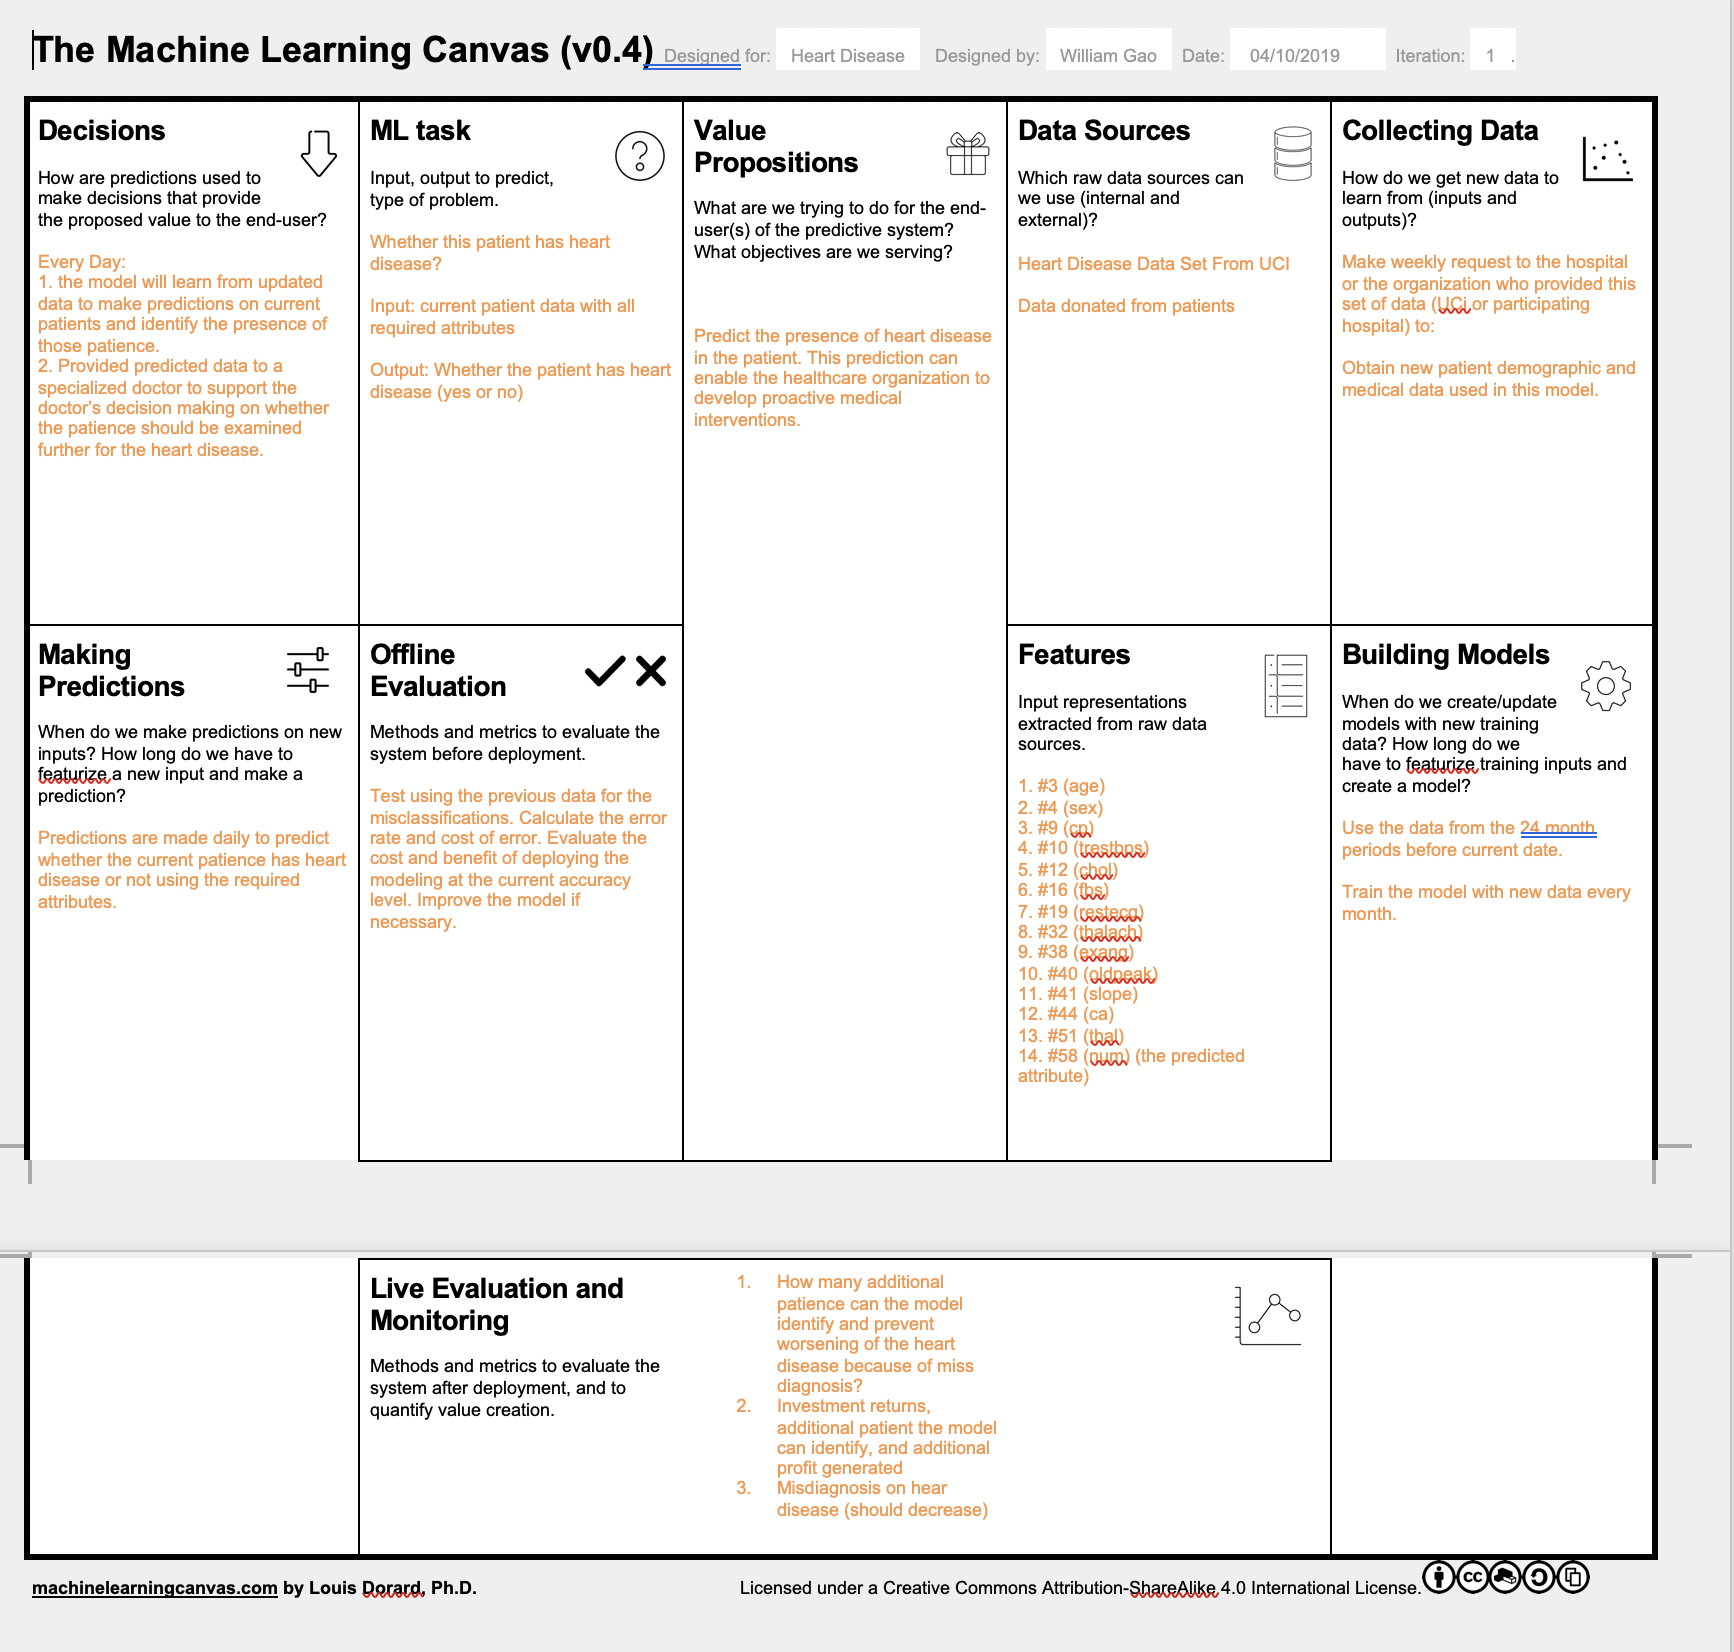

In [46]:
Image("Screen Shot 2019-05-06 at 7.18.46 PM.png", width=700)